In [1]:
#Importar librerias.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#Cargar datos. 
df=pd.read_csv("/home/jovyan/Tesis/TethaF2.csv")
df

,h,Tilt angle β,δ (declinación),cos(θ) formula 1,cos(θ) formula 2,A,Latitude φ,cos(δ),sin(δ),cos(β),sin(β),cos(ω),sin(ω),cos(y),sin(y),cos(φ),sin(φ),Zenit,Rb
0,1,0,-23.011637,0.348114,0.735362,5.4,19.32361,0.920425,-0.390918,1,0,0.995562,0.094108,0.943665,0.330903,0.943665,0.330903,0.735362,1
1,2,0,-22.930544,0.346953,0.736312,5.4,19.32361,0.920978,-0.389615,1,0,0.995562,0.094108,0.943665,0.330903,0.943665,0.330903,0.736312,1
2,3,0,-22.842656,0.345695,0.737340,5.4,19.32361,0.921574,-0.388202,1,0,0.995562,0.094108,0.943665,0.330903,0.943665,0.330903,0.737340,1
3,4,0,-22.747999,0.344339,0.738446,5.4,19.32361,0.922214,-0.386679,1,0,0.995562,0.094108,0.943665,0.330903,0.943665,0.330903,0.738446,1
4,5,0,-22.646602,0.342885,0.739628,5.4,19.32361,0.922897,-0.385046,1,0,0.995562,0.094108,0.943665,0.330903,0.943665,0.330903,0.739628,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,360,0,-23.354300,0.353009,0.731331,5.4,19.32361,0.918071,-0.396416,1,0,0.995562,0.094108,0.943665,0.330903,0.943665,0.330903,0.731331,1
360,361,0,-23.314410,0.352440,0.731802,5.4,19.32361,0.918347,-0.395776,1,0,0.995562,0.094108,0.943665,0.330903,0.943665,0.330903,0.731802,1
361,362,0,-23.267611,0.351772,0.732353,5.4,19.32361,0.918670,-0.395026,1,0,0.995562,0.094108,0.943665,0.330903,0.943665,0.330903,0.732353,1
362,363,0,-23.213917,0.351005,0.732986,5.4,19.32361,0.919040,-0.394165,1,0,0.995562,0.094108,0.943665,0.330903,0.943665,0.330903,0.732986,1


In [3]:
#Convertir la columna "h" en índice.
df.index=df.h
df=df.drop('h',axis=1)

In [4]:
#Seleccionar únicamente la columna cos (0) formula 2. 
column=df["cos(θ) formula 2"]

In [5]:
#Generar un nuevo df con las columnas que nos interesan.
df2= {"Días": np.arange(1,365),"cos":column}
df3 = pd.DataFrame(df2)

In [6]:
#Generar el df definitivo con el índice de 1 a 365 y con la columna seleccionada.
df3.index=df3.Días
df3=df3.drop('Días',axis=1)

In [7]:
#Generar slices para cada mes, considerando la numeración seleccionada en el índice. 
df_ene=df3.loc[df3.index<32]
df_feb=df3.loc[(df3.index>=32) & (df3.index<=59)]
df_mar=df3.loc[(df3.index>=60) & (df3.index<=90)]
df_abr=df3.loc[(df3.index>=91) & (df3.index<=120)]
df_may=df3.loc[(df3.index>=121) & (df3.index<=151)]
df_jun=df3.loc[(df3.index>=152) & (df3.index<=181)]
df_jul=df3.loc[(df3.index>=182) & (df3.index<=212)]
df_ago=df3.loc[(df3.index>=213) & (df3.index<=243)]
df_sep=df3.loc[(df3.index>=244) & (df3.index<=273)]
df_oct=df3.loc[(df3.index>=274) & (df3.index<=304)]
df_nov=df3.loc[(df3.index>=305) & (df3.index<=334)]
df_dic=df3.loc[(df3.index>=335) & (df3.index<=365)]

In [8]:
#Obtener el promedio por mes de los valores presentes en cada slice.
df_enef = df_ene["cos"].mean()
df_febf = df_feb["cos"].mean()
df_marf = df_mar["cos"].mean()
df_abrf = df_abr["cos"].mean()
df_mayf = df_may["cos"].mean()
df_junf = df_jun["cos"].mean()
df_julf = df_jul["cos"].mean()
df_agof = df_ago["cos"].mean()
df_sepf = df_sep["cos"].mean()
df_octf = df_oct["cos"].mean()
df_novf = df_nov["cos"].mean()
df_dicf = df_dic["cos"].mean()

In [9]:
#Establecer el área, la eficiencia del modelo de panel fotovoltaico seleccionado (23.3%) y los cuantiles calculados
#con base en la base de datos perteneciente a la ROUA.
a = 600 #area 
ef = 0.233 #eficiencia del panel 
qene=[4031.41, 4896.74, 5765.40] #QS de irradiancia w/m^2
qenef = [round(x * 31, 2) for x in qene] #Debido a que estos valores representan los cuantiles diarios; para obtener su producción 
#mensual es necesario multiplicar los valores por el número de días que tiene ese mes. 
qfeb=[5048.50, 5901.70, 6636.49]
qfebf = [round(y * 28, 2) for y in qfeb]

qmar=[5577.14, 6526.70, 7173.30]
qmarf = [round(z * 31, 2) for z in qmar]

qabr=[5586.60, 6320.90, 7218.00]
qabrf = [round(a * 30, 2) for a in qabr]

qmay=[5309.90, 6234.50, 6933.12]
qmayf = [round(b * 31, 2) for b in qmay]

qjun=[4358.55, 5712.90, 6980.62]
qjunf = [round(c * 30, 2) for c in qjun]

qjul=[4368.49, 5455.83, 6475.32]
qjulf = [round(d * 31, 2) for d in qjul]

qago=[4445.10, 5413.00, 6175.70]
qagof = [round(e * 31, 2) for e in qago]

qsep=[3639.54, 4605.70, 5523.45]
qsepf = [round(f * 30, 2) for f in qsep]

qoct=[3775.40, 4922.95, 5918.26]
qoctf = [round(g * 31, 2) for g in qoct]

qnov=[3873.32, 5103.45, 5732.40]
qnovf = [round(h * 30, 2) for h in qnov]

qdic=[4001.19, 4816.86, 5745.57]
qdicf = [round(j * 31, 2) for j in qdic]

In [10]:
#Calcular la producción del sistema de paneles fotovoltaicos por mes y con base en las fórmulas seleccionadas. 
Qsene = []
for ii in qenef:
    irr = (ii*df_enef*a*ef)/1000000
    Qsene.append(round(irr,2))

Qsfeb = []
for aa in qfebf:
    irr1 =(aa*df_febf*a*ef)/1000000
    Qsfeb.append(round(irr1,2))

Qsmar=[]
for cc in qmarf:
    irr2 =(cc*df_marf*a*ef)/1000000
    Qsmar.append(round(irr2,2))

Qsabr = []
for ee in qabrf:
    irr3 =(ee*df_abrf*a*ef)/1000000
    Qsabr.append(round(irr3,2))

Qsmay = []
for gg in qmayf:
    irr4 =(gg*df_mayf*a*ef)/1000000
    Qsmay.append(round(irr4,2))

Qsjun = []
for jj in qjunf:
    irr5 =(jj*df_junf*a*ef)/1000000
    Qsjun.append(round(irr5,2))

Qsjul = []
for mm in qjulf:
    irr6 = (mm*df_julf*a*ef)/1000000
    Qsjul.append(round(irr6,2))

Qsago = []
for oo in qagof:
    irr7 =(oo*df_agof*a*ef)/1000000
    Qsago.append(round(irr7,2))

Qssep = []
for qq in qsepf:
    irr8 =(qq*df_sepf*a*ef)/1000000
    Qssep.append(round(irr8,2))

Qsoct = []
for rr in qoctf:
    irr9 =(rr*df_octf*a*ef)/1000000
    Qsoct.append(round(irr9,2))

Qsnov = []
for tt in qnovf:
    irr10 =(tt*df_novf*a*ef)/1000000
    Qsnov.append(round(irr10,2))

Qsdic = []
for vv in qdicf:
    irr11 =(vv*df_dicf*a*ef)/1000000
    Qsdic.append(round(irr11,2))

In [12]:
#Separar en una variable los Q1, en otra los Q2 y en otra los Q3.
Q1=np.array([Qsene[0],Qsfeb[0],Qsmar[0],Qsabr[0],Qsmay[0],Qsjun[0],Qsjul[0],Qsago[0],Qssep[0],Qsoct[0],Qsnov[0],Qsdic[0]])
Q2=np.array([Qsene[1],Qsfeb[1],Qsmar[1],Qsabr[1],Qsmay[1],Qsjun[1],Qsjul[1],Qsago[1],Qssep[1],Qsoct[1],Qsnov[1],Qsdic[1]])
Q3=np.array([Qsene[2],Qsfeb[2],Qsmar[2],Qsabr[2],Qsmay[2],Qsjun[2],Qsjul[2],Qsago[2],Qssep[2],Qsoct[2],Qsnov[2],Qsdic[2]])

CONSUMO ENCIT

In [13]:
#Obtener los promedios por mes para su mejor representación.
cenef=(3.53+5.33)/2
cfebf=round((4.5+6.22)/2,2)
cmarf=round((4.86+5.01)/2,2)
cabrf=round((4.33+5.53)/2,2)
cmayf=round((5.16+5.07)/2,2)
cjunf=round((3.73+4.23)/2,2)
cjulf=round((2.98+4.18)/2,2)
cagof=round((3.50+4.59)/2,2)
csepf=round((3.84+4.92)/2,2)
coctf=round((4.51+5.45)/2,2)
cnovf=round((4.48+5.04)/2,2)
cdicf=round((3.47+4.13)/2,2)

In [14]:
#Guardar los datos finales en una nueva variable para su representación en el gráfico. 
consfin = [cenef,cfebf,cmarf,cabrf,cmayf,cjunf,cjulf,cagof,csepf,coctf,cnovf,cdicf]

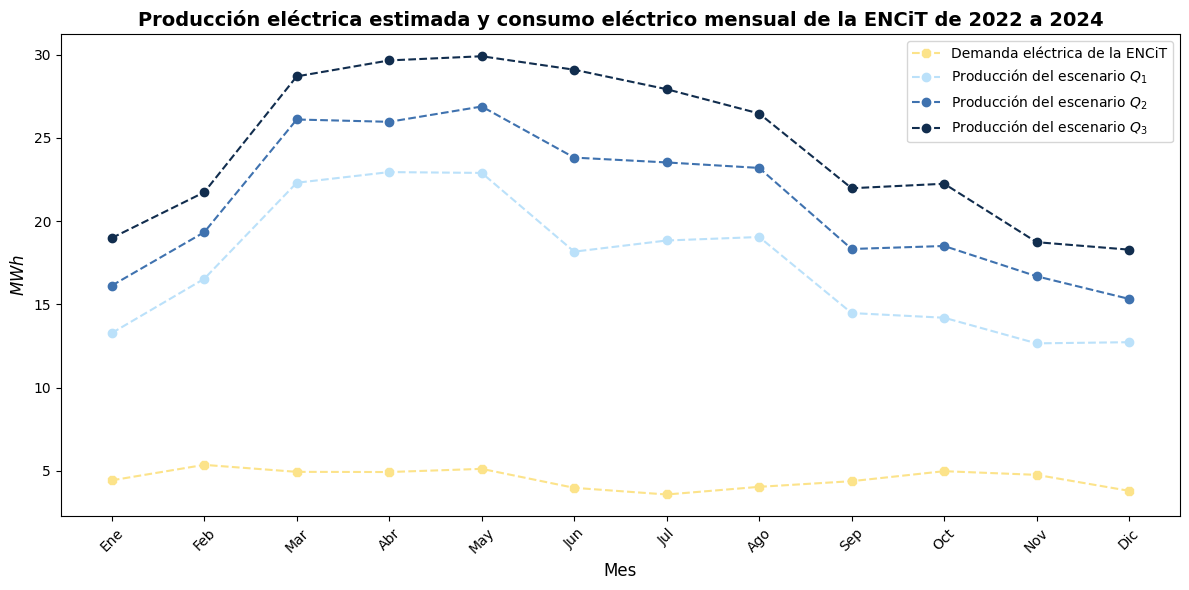

In [16]:
#Generar una variable que contenga los meses del año para su uso en el eje "X" de la gráfica. 
mes2= ["Ene","Feb","Mar","Abr","May","Jun","Jul","Ago","Sep","Oct","Nov","Dic"]

#Crear la figura. 
fig, ax = plt.subplots(figsize=(12, 6))

#Representar la demanda eléctrica mediante una línea. 
ax.plot(mes2, consfin, marker="8", linestyle='--', color="#FCE38A", label='Demanda eléctrica de la ENCiT')

# Representar la producción eléctrica proyectada mediante líneas. 
ax.plot(mes2, Q1, color='#BBE1FA', marker="o", linestyle='--', label="Producción del escenario $Q_1$")
ax.plot(mes2, Q2, color='#3F72AF', marker='o', linestyle='--', label="Producción del escenario $Q_2$")
ax.plot(mes2, Q3, color='#112D4E', marker="o", linestyle='--', label="Producción del escenario $Q_3$")

#Configurar la vista del gráfico.
ax.set_title("Producción eléctrica estimada y consumo eléctrico mensual de la ENCiT de 2022 a 2024", fontsize=14, fontweight="bold")
ax.set_xlabel("Mes", fontsize=12)
ax.set_ylabel(r'$MWh$', fontsize=12)
ax.set_xticks(mes2)
ax.tick_params(axis='x', rotation=45)
ax.legend(loc='upper right')
plt.tight_layout()

#plt.savefig("ProduccionElectProyect.svg", format="svg",dpi=300, bbox_inches='tight')
plt.show()